### Unsupervised Learning

In practice, there are many problems where the data is not labeled and hence, unsupervised learning comes to play. Dimensionality reduction is a kind of unsupervised learning. Other unsupervised learning algorithms:

- __Clustering__: Grouping data in clusters, it useful for segmentation, recommender system etc.
- __Anomaly detection__: predicting outliers abd detecting abnormal data points
- __Density Estimation__:estimating probability density function of the random process that generated dataset.  usefull for analysis and visualization.

### Clustering


Clustering is identifying and assigning similar data points into same groups. Instances with similar features can be placed inthe same group, this is useful in variety of applications:

- __Customer Segmentation:__ we can cluster similar customers together based on their purchases or transaction patterns, this clustering can help in designing better and more targeting marketing strategies or recommender systems. 
- __Data Analysis:__ we can draw better insights if we are able to identify and assign clusters in the dataset
- __Dimensionality reduction technique:__ After clustering the dataset we can measure the affinity of each instance with each cluster. each feature vector can be replaced with the vector of its cluster affinities. 
- __Anomaly Detection:__ and instance can cannot be clusters with close affinity to otehr instances is a potential outlier or anomaly in the dataset. We can use this to identify fraudulent transactions etc
- __Semi-supervised learning:__ if we have partially labeled dataset, then we can use clustering to form clusters and use the clusters to lable the unlabled dataset, which will lead to a better model
- __Search Engines:__ search engines use clustering for idefying the image searche results by puttign the same images in the same clusters.
- __Image Segmentation:__ We can cluster image pixels based on color, making object detection and trakcing easier. 


There's no one defination of a cluster, it can vary from data to data. Different algorithms capture different kind of clusters, some look for instance created aroung a particular point, called centroid. Some look for regions of densly packed instances, which can be of any shape. 

#### Main Clustering Algorithms

__K-Means__

it was proposed and developed by Stuart LLoyd Edward W. Forgy, hence sometimees refered as LLoyd-Forgy. 

Fitting kmeans on iris dataset

In [36]:
from sklearn import datasets 
import numpy as np

iris = datasets.load_iris()


X= iris["data"][:,(2,3)]
y= iris["target"].astype(np.float64)

In [39]:
iris.feature_names[2:]

['petal length (cm)', 'petal width (cm)']

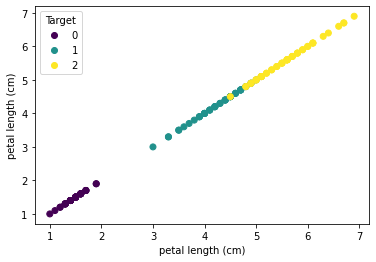

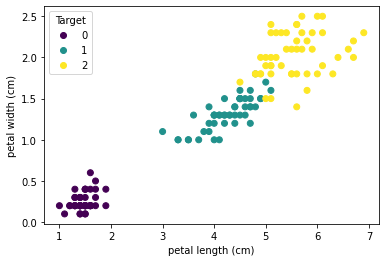

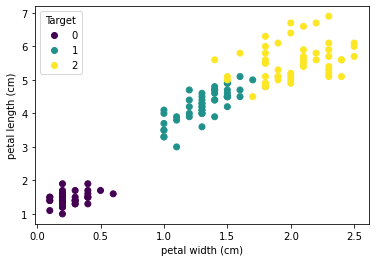

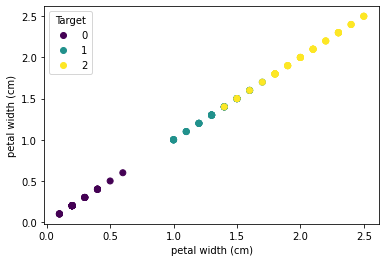

In [40]:
import matplotlib.pyplot as plt

for i in range(0,len(X[0])):
    for j in range(0,len(X[0])):
        scatter = plt.scatter(X[:,i],X[:,j],c=y, label = y)
        plt.xlabel(iris.feature_names[2+i])
        plt.ylabel(iris.feature_names[2+j])
        plt.legend(handles=scatter.legend_elements()[0],
           labels=[0,1,2],
           title="Target")
        plt.show()

In [41]:
##Training a kmeans on the data
from sklearn.cluster import KMeans

k = 3 ##For 3 clusters, easy here since we already know

##We are treating the data as an unlabelled data, hence ignoring the target values
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(X)

In [42]:
from joblib import dump
dump(kmeans,'models/ch_09/kmeans_iris.pkl')

['models/ch_09/kmeans_iris.pkl']

In [43]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
y_pred is kmeans.labels_

##KMeans instance preserves a copy of the labels of the 
##instances it was trained on

True

In [45]:
##Looking at the centroids

kmeans.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

In [14]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

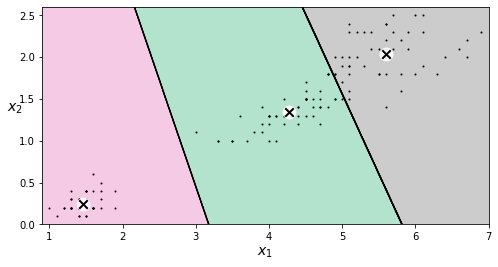

In [47]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

#### Hard Clustering vs Soft Clustering

Rather than choosing the closest cluster for each instance, which is called hard clustering, it might be better measure the distance of each instance to all 3 centroids. This is what the transform() method does:

In [51]:
kmeans.transform([[0.2,1.4]])

array([[4.06963972, 1.71007602, 5.43336209]])

In [52]:
kmeans.predict([[0.2,1.4]])

array([1])

the new featues is clearly closest to the cluster 1

#### K-means algorithm

Since kmeans works based on distance of the centroid. It works by find a starting centroid and updating it continously. The centroids are initialized randomly, then the instances are labeled, then the centroids are updated, the instances are relabeled, and so on. after a few iterations the algorithm reaches a clustering that seems close to optimal.

The computation complexity of kmeans is generally linear in regards to the number of instances m, number of clusters k and the number of dimensions n. It's only true when the data has a clustering structure. In worst case, the complexity can increase exponentially with the number of instances. In practice, it rarely happens hence kmeans is a fast algorithm. 


A lot of thins are dependent on the intial centroid assignment, if the asisgnment is not correct and the clusters have no distinct boundaries we may end up with sub optimal solution. We can use a few techniques to imrpve the centroid initialization. 

#### Centroid Initialization methods

If we have a vague idea of where the cetroids may lie then we can initalize this using init hyperparatmeres to a numpy array containing the list of centroids and set n_init to 1

In [54]:
good_init = np.array([[4.1,1.2],[1.3,0.2],[5,2]])

In [55]:
kmeans_gi = KMeans(n_clusters = 3, init = good_init, n_init = 1)

In [57]:
kmeans_gi.fit(X)
kmeans_gi.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

In [58]:
dump(kmeans_gi,'models/ch_09/kmeans_gi.pkl')

['models/ch_09/kmeans_gi.pkl']

Another solution is to run the algorithm multiple times with different random initializations and keep the best solutions. The number of random initalizations is controlled by then n_init hyperparamter by default it is equal to 10, which means the algo runs 10 times. 

sklearn has a feature called inertia to keep track of which solution gives better result. it is the mean squared distance between each instance and its closest centroid. It aims to achieve the lowest value on this for the best model.

In [59]:
kmeans.inertia_

31.371358974358984

In [60]:
kmeans.score(X)

-31.371358974358984

The score() method returns the negative inertia. Why negative? Because a
predictor’s score() method must always respect Scikit-Learn’s “greater is
better” rule: if a predictor is better than another, its score() method should
return a greater score.

Kmeans ++ was propsed in 2006 to solve the centroid initialization problem, highlighting the impact of correct initialization. Correct initialization can help reduce the number of times the algorithm needs to run. 

The KMeans class uses this initialization method by default. If we want to
force it to use the original method (i.e., picking k instances randomly to
define the initial centroids), then we can set the init hyperparameter to
"random". We will rarely need to do this, since we need a more calculated intialization. 

#### Accelerated K-means and mini batch Kmeans

Accelerated Kmeans helps to reduce the training time by avoiding unnecessary distant calculations. This is acheived by exploting the triangle inequality andn by keeping track of lower and upper bounds for distances between instances and centroids. This is used in KMeans by default, we can force the original algo by forcing hyperparameter "algorithm = "full"".

Another alternative, is mini batch means for reducing the trianing time. Instead of using the full dataset at each iteration, the algorithm uses mini batches moving the centroid just slightly at each iteration. 

In [65]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans( n_clusters = 3)
minibatch_kmeans.fit(X)

dump(minibatch_kmeans,'models/ch_09/minibatch_kmeans.pkl')

['models/ch_09/minibatch_kmeans.pkl']

In [66]:
minibatch_kmeans.cluster_centers_

array([[1.46200306, 0.24388379],
       [5.66447368, 2.06973684],
       [4.35406336, 1.37961433]])

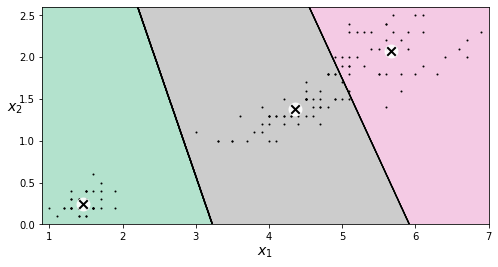

In [68]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(minibatch_kmeans, X)
plt.show()

If the dataset does not fit in memory, the simplest option is to use the
memmap class, as we did for incremental PCA. Alternatively, we can pass one mini-batch at a time to the partial_fit() method, but this will require much more work, since we will need to perform multiple initializations and select the best one ourself (see the mini-batch K-Means section of the notebook for an example).

Although the Mini batch Kmeans algorithm is much faster than the regular K means algorithm, it's inertia is generally slightly worse, easpecially when the number of clusters increases.


#### Finding the optimal number of clusters

So far we knew the number of clusters to be identified, however in practice this might not be the case. Inertia is also not a good metric for identifying this. Since it keeps getting lower as we increase the numebr of clusters. 

A mroe precise approach to use is the silhoutte score, which is the mean silhoutte coefficient over all the instances. An instance's silhoutte coefficient is equal to (b-a)/max(a,b) where a is the mean distance to the other instances in the same cluster and b is the mean nearest cluster distance. 

In [69]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.6604800083974887

In [74]:
# Checking silhouette score for different k
k_x = []
s_score = []

for k in range(2,12):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    s_score.append(silhouette_score(X, kmeans.labels_))
    k_x.append(k)

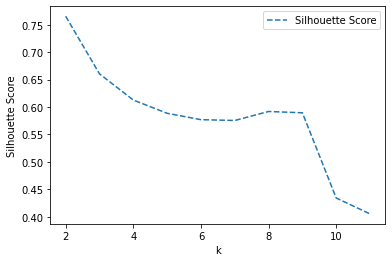

In [80]:
plt.plot(k_x,s_score, '--',label = "Silhouette Score")
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.legend()

An even more informative visualization is obtained when you plot every
instance’s silhouette coefficient, sorted by the cluster they are assigned to
and by the value of the coefficient. This is called a silhouette diagram


#### Limits of K-means

As in the last example, we saw that inspite of 3 clusters, we got 2 identifyable clusters. It's sometimes necessary to run the algorithm several times to avoid suboptimal solutions. k-means might not perform that well if the clusters are not of same size, have different densities or have non spherical shapes. So, depending on the data, different clustering algorithms may perform better. On these types of elliptical clusters, Gaussian mixture models work great.

It's important to scale the input features before running the K-means or the clusters may be very stretched and kmeans perform poorely. Scaling the features does not guarantee that all the clusters will be nice and spherical, but it generally improves things.

#### Using clustering for image segmentation 

Image segmentation is the task of partioning an image into multiple segments.
- In semantic segmentation, all pixels that are part of the same object type get assigned to the same segment. 
- In instance segmnetation, all the pixels that are part of the same individual object are assigned to the same segmentat. 
- In Color segmentation assigns same segment to the pixels that have same color. 

In [2]:
from matplotlib.image import imread

image = imread("ladybug.jpg")
image.shape

(225, 316, 3)

Image is a 3D array, 1st dimension is the heigth, secong is width, third is the number of color chanels here it's RGB. Some images have an adidtional channel called alpha channel for transparency. 

In [3]:
X = image.reshape(-1,3)

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 8).fit(X)

In [7]:
from joblib import dump
dump(kmeans,'models/ch_09/img_kmeans.pkl')

['models/ch_09/img_kmeans.pkl']

In [8]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

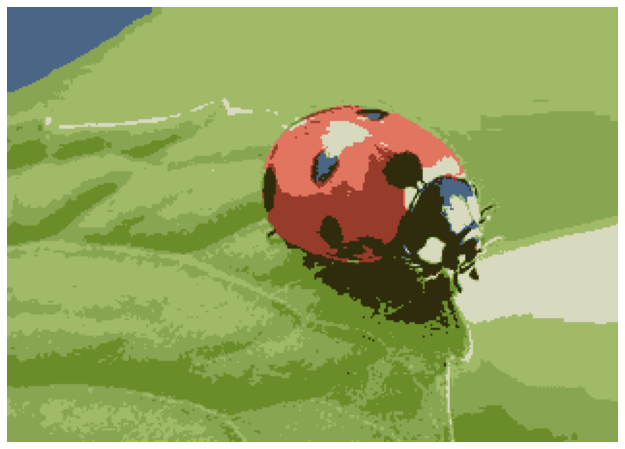

In [12]:
import matplotlib.pyplot as plt 


plt.figure(figsize=(12, 8))
plt.imshow(segmented_img.astype(int))
plt.axis('off')
plt.show()

#### Using clustering for preprocessing

clustering can be used as preprocessign step before supervised learning algorithm. Testing on mnist dataset

In [14]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y = True)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
##Fitting a logistic model

from sklearn.linear_model import LogisticRegression 

log_reg = LogisticRegression(solver='liblinear', multi_class='auto')
log_reg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [41]:
dump(log_reg,'models/ch_09/log_reg_img.pkl')

['models/ch_09/log_reg_img.pkl']

In [42]:
log_reg.score(X_test, y_test)
##Baseline

0.9555555555555556

In [43]:
##Using Kmeans as preprocssing

from sklearn.pipeline import Pipeline

kmeans = Pipeline([
    ("kmeans",KMeans(n_clusters = 50)),
    ("log_reg",LogisticRegression(solver='liblinear', multi_class='auto')),
])

In [44]:
kmeans.fit(X_train,y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression(solver='liblinear'))])

In [45]:
kmeans.score(X_test, y_test)

0.9822222222222222

Using Kmeans as preprocessing increases the accuracy by 3%. This is on choosing an arbitary n_cluster, we can use gridsearch for a better selection of the paramters

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(kmeans, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.1s
[CV] END ...............................kmeans_

[CV] END ..............................kmeans__n_clusters=35; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=36; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=36; total time=   0.5s
[CV] END ..............................kmeans__n_clusters=36; total time=   0.5s
[CV] END ..............................kmeans__n_clusters=37; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=37; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=37; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=38; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=38; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=38; total time=   0.5s
[CV] END ..............................kmeans__n_clusters=39; total time=   0.5s
[CV] END ..............................kmeans__n_clusters=39; total time=   0.5s
[CV] END ...................

[CV] END ..............................kmeans__n_clusters=69; total time=   0.8s
[CV] END ..............................kmeans__n_clusters=70; total time=   0.7s
[CV] END ..............................kmeans__n_clusters=70; total time=   0.8s
[CV] END ..............................kmeans__n_clusters=70; total time=   0.7s
[CV] END ..............................kmeans__n_clusters=71; total time=   0.8s
[CV] END ..............................kmeans__n_clusters=71; total time=   0.8s
[CV] END ..............................kmeans__n_clusters=71; total time=   0.8s
[CV] END ..............................kmeans__n_clusters=72; total time=   0.8s
[CV] END ..............................kmeans__n_clusters=72; total time=   0.8s
[CV] END ..............................kmeans__n_clusters=72; total time=   0.9s
[CV] END ..............................kmeans__n_clusters=73; total time=   0.9s
[CV] END ..............................kmeans__n_clusters=73; total time=   0.9s
[CV] END ...................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [47]:
dump(kmeans,'models/ch_09/kmeans_img.pkl')
dump(grid_clf,'models/ch_09/grid_clf_img.pkl')

['models/ch_09/grid_clf_img.pkl']

In [48]:
grid_clf.score(X_test, y_test)

0.9844444444444445

In [49]:
grid_clf.best_params_

{'kmeans__n_clusters': 90}

So the accuracy can be futher improved to 98.44% using n_clusters = 90 

#### Using Clustering for semi-supervised learning

we can use clustering for semi supervised learning, when partial labels for the dataset are avaialble.  

In [50]:
n_labeled = 50

log_reg = LogisticRegression(solver='liblinear', multi_class='auto')
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])

LogisticRegression(solver='liblinear')

In [51]:
log_reg.score(X_test, y_test)

0.8422222222222222

The accuracy is just 84.2%. we can improve this. let’s cluster the training set into 50 clusters. Then for each cluster, let’s find the image closest to the centroid. We will call these images the representative images

In [53]:
import numpy as np

k = 50
kmeans = KMeans(n_clusters = k)

X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [59]:
len(X_representative_digits)

50

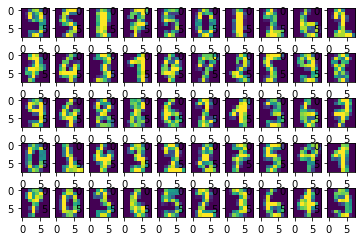

In [70]:
import matplotlib.pyplot as plt
figure, axis = plt.subplots(5, 10)
i = 0

for x in X_representative_digits:
    img = x.reshape(8,8)
    axi = i%10
    axj = int(i/10)
    axis[axj,axi].imshow(img)
    #print(i,axi,axj)
    i = i + 1
    
plt.show()

In [71]:
y_train[representative_digit_idx]

array([9, 5, 1, 7, 5, 0, 1, 2, 6, 2, 7, 4, 3, 1, 4, 7, 2, 5, 9, 8, 9, 4,
       8, 8, 6, 2, 1, 3, 6, 7, 0, 1, 4, 3, 2, 8, 7, 5, 9, 1, 9, 0, 3, 6,
       5, 2, 3, 6, 4, 9])

In [72]:
y_representative_digits = y_train[representative_digit_idx].copy()

In [73]:
log_reg = LogisticRegression(solver='liblinear', multi_class='auto')
log_reg.fit(X_representative_digits, y_representative_digits)
dump(log_reg,'models/ch_09/semi_log_reg.pkl')

['models/ch_09/semi_log_reg.pkl']

In [74]:
log_reg.score(X_test,y_test)

0.9155555555555556

The accuracy increased from 84% to 91% by training only on 50 instances.

We can try label propogation.

In [75]:
y_train_propogated = np.empty(len(X_train) , dtype = np.int32)

for i in range(k):
    y_train_propogated[kmeans.labels_ == i] = y_representative_digits[i]

In [76]:
log_reg = LogisticRegression(solver='liblinear', multi_class='auto')
log_reg.fit(X_train, y_train_propogated)
dump(log_reg,'models/ch_09/label_propogation_log_reg.pkl')

['models/ch_09/label_propogation_log_reg.pkl']

In [77]:
log_reg.score(X_test, y_test)

0.9177777777777778

The accuracy boost is not excpetional. The problem is that we propagated each representative instance’s label to all the instances in the same cluster, including the instances located close to the cluster boundaries, which are more likely to be mislabeled. Let’s see what happens if we only propagate the labels to the 30% of the instances that are closest to the centroids:

In [78]:
percentile_closest = 30

In [80]:
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

In [81]:
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [82]:
partially_propogated = (X_cluster_dist != -1)

In [85]:
X_train_partially_propagated = X_train[partially_propogated]
y_train_partially_propagated = y_train[partially_propogated]

In [86]:
log_reg = LogisticRegression(solver='liblinear', multi_class='auto')
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
dump(log_reg,'models/ch_09/partial_propogation_log_reg.pkl')

['models/ch_09/partial_propogation_log_reg.pkl']

In [87]:
log_reg.score(X_test, y_test)

0.9355555555555556

The accuracy has improved by 2% using only 50 instances

#### Active Learning

To continue improving the model and the training set, we can do active learning rounds. There are many different strategies for active learning one of the most common ones is called uncertainity sampling. 

1. The model is trained on the labeled instances gathered so far, and this model is used to make predictions on all the unlabeled instances.
2. The instances for which the model is most uncertain (i.e., when its estimated probability is lowest) are given to the expert to be labeled.
3. You iterate this process until the performance improvement stops being worth the labeling effort.

Other strategies include labeling the instances that would result in the largest model change, or the largest drop in the model’s validation error, or the instances that different models disagree on

### DBSCAN

This algorithm deifnes the clusters as continous regions of high density. Working - 

1. For each instance, the algorithm counts how many instances are located within a small distance $\epsilon$ from it. it's called $\epsilon$ neighbourhood. 
2. if the #instance in this neighbourhood is atleast min_samples, then it's called core instance (dense region)
3. all these instance in the dense region are assigned same clusters
4. other instances outside the dense resion are considered anomaly

it works well if the dense regions and anomalies are well separated.

In [1]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples = 1000, noise = 0.1)
dbscan = DBSCAN(eps = 0.05, min_samples = 3)
dbscan.fit(X)

DBSCAN(eps=0.05, min_samples=3)

In [23]:
from joblib import dump

dump(dbscan,'models/ch_09/dbscan.pkl')

['models/ch_09/dbscan.pkl']

In [24]:
dbscan.labels_

array([-1, -1,  0,  1,  2,  3, -1,  4,  5,  4,  6,  1,  5,  7,  6,  3, -1,
       -1,  8,  8,  9,  7, 10, -1, 11,  6,  6,  1, 12,  8, 13, -1,  6,  0,
       14, 15,  5, -1,  1, 16,  0, 17, 11, 18,  0,  1,  8,  5,  1,  0,  5,
        1, 19,  1, 17,  6, 36, 20, 21, 20,  7,  6,  6, 52, -1,  6,  1, -1,
        6, 10,  3, 22, -1, 21,  3, 24, 16,  8,  1,  4, 20,  5, 23,  0, 12,
       -1,  1, -1,  1, 12,  3,  3, 10, 24, 43,  2, 25,  1,  6,  3, -1, 24,
       11, 14, 23, 26,  0,  6,  8, 14,  6,  1,  6,  8, 20, 27,  1,  6,  6,
       27, 12, -1, 18, 20, 14, 28,  1,  3, 16, 29, -1,  3,  4, -1,  3,  0,
       -1, 16, -1,  6,  6,  1,  6, 26, -1, 23,  1, 13, -1, 23,  3,  8,  3,
       16, 24, -1, 21,  4, 22,  8, 23, -1,  0,  0, 11,  3, 16,  3, -1,  7,
        6, 30, 12,  1, -1, 21,  3,  6, 24, -1, 11, 14,  8, 14, -1, 22, 21,
       14, 21, 22, -1, 21, 50, 27, 30,  1,  2,  8, 11, 51, 23,  0,  1,  6,
        0,  6, -1, -1,  6,  3, 49,  0,  3, 31, 49, 29,  3,  1, -1,  8,  7,
        3, 20,  1, 32, -1

Text(0, 0.5, 'x1')

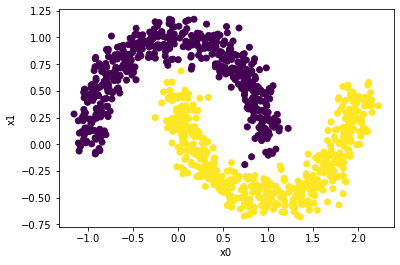

In [26]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c = y)
plt.xlabel('x0')
plt.ylabel('x1')

some clusters are assigned -1. these are anomalies. Core instances can be ound in core_sample_indices

In [28]:
len(dbscan.core_sample_indices_)

776

In [30]:
dbscan.core_sample_indices_

array([  2,   3,   4,   5,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        18,  19,  20,  21,  22,  24,  26,  27,  28,  29,  30,  32,  33,
        34,  35,  38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  57,  58,  59,  60,  61,  62,  65,
        66,  68,  69,  70,  71,  73,  74,  78,  79,  80,  81,  82,  83,
        84,  86,  88,  89,  90,  91,  92,  93,  95,  96,  97,  98,  99,
       101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128,
       129, 131, 132, 134, 135, 139, 140, 141, 145, 146, 149, 150, 151,
       152, 153, 154, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166,
       167, 169, 170, 171, 172, 173, 175, 176, 177, 180, 181, 182, 183,
       185, 186, 187, 189, 191, 193, 196, 197, 198, 200, 201, 202, 203,
       204, 208, 209, 211, 212, 213, 215, 216, 217, 219, 220, 221, 223,
       224, 226, 227, 228, 229, 230, 233, 234, 235, 237, 238, 24

In [31]:
dbscan.components_

array([[ 1.68106624, -0.25923558],
       [ 0.89708991,  0.31575113],
       [-0.69169556,  0.70720176],
       ...,
       [ 0.11886771,  0.24062192],
       [-0.77085829,  0.66636717],
       [ 0.15408916,  0.12721143]])

```DBSCAN``` class doesn't have a predict() method, it does have a fit_predict() method. It cannot predict where a new cluster in the instance belong, only predict the cluster of the existing instances. we need to use a different classifier to predict the new class like KNN

In [32]:
X_train = dbscan.components_
y_train = dbscan.labels_[dbscan.core_sample_indices_]

In [33]:
print(len(X_train),len(y_train))

776 776


In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=50)

In [35]:
dump(knn,'models/ch_09/dbscan_knn.pkl')

['models/ch_09/dbscan_knn.pkl']

In [37]:
import numpy as np
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

In [38]:
knn.predict(X_new)

array([11, 23, 21,  5], dtype=int64)

In [39]:
knn.predict_proba(X_new)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.  ,
        0.34, 0.  , 0.28, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.2 , 0.  , 0.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02],
       [0.  , 0.  , 0.  , 0.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.02, 0.  , 0.  , 0.  ,
        0.  , 0.72, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.02, 0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.32,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.28, 0.  , 0.04, 0.  , 0.  , 0.  ,
        0.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.  

We could similarily train the model to the entire dataset including the anomalies, dependign on the task requirements 

In [40]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)

In [41]:
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]

In [42]:
y_pred[y_dist > 0.2] = -1

In [43]:
y_pred.ravel()

array([-1, 35, 33, -1], dtype=int64)

__DBSCAN__ is a powerfuk algorithm to assgin clusters to the datasets which is also robust to the outliers. we can also try hierarchical DBSCAN (HDBSCAN)

#### Other Clustering Algorithm

__Agglomerative clustering__

hierarchy of the clusters is formed bottom up. At each iteration the instance is attached to nearest pair of cluster, starting with individual instances. The algo works well for smaller dataset, but doesn't scale well for the large datasets.

__BIRCH__

Balances iterative reducing and clsutering using hierarchies algorithm was desging for large datasets. It can be fater than batch KMeans with similar results as long as the number of features is not too large (<20). It builds a tree structure containing just enough information to quickly assign each new instance to a cluster, without having to store all the instances in the tree. it allow the use of  limited memmory handling large dataset 

__Mean-Shift__

it starts with a center of a circle assigned to each instance, which calcuales the mean of all the instances in the circle and shifts the center of the circle accordingly. it makes these adjustements on iteration until the circles stop moving. all the instnaces whose circcle have settled to same point are assigned the same clsuter. Not for large dataset due to computional complexity of $O(m^2)$

__Affinity propogation__

This algorithm uses voting system, where the instance vote for similar instances to be their representative, and once the algorithm converges each representative and its voters for a cluster. It can identify any size or shape of the clsuter. This is again not for large dataset due to computional complexity of $O(m^2)$

__Spectral clustering__

It takes the similarity matrix between the instance and creates a low-dimensional embedding from it, then it uses a clustering algorithm in this low dimensional space. it can capture complex cluster structure, can be used to cut graphs. it doesn't work well with large dataset or different shape of clusters.

### Gaussian Mixture

GMM - gaussian mixture model is a probabilistic model tht assumes that the instances were generated from a mixture of secveral gaussian distribution who paramters are unknown. all the instances are generated from a single gaussian distribution form a lcuster that typically looks like an ellipsoid.  there are various variants available, implemented in GaussianMixture class.  

The dataset X is assumed to have been generated through the following probabilistic process:

1. for each instance, a cluster is picked randomly from k. the probabiltiy of pickiing this cluster is $\phi^j$
2. the location of the instance is picked from gaussian distriution with the mean $\mu^j$ abd covariance matrix $\sum^j$ 

In [2]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 3, n_init = 10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [3]:
gm.weights_

array([0.21309275, 0.21115416, 0.57575309])

In [4]:
gm.means_

array([[ 1.7076882 , -0.08176312],
       [-0.73828457,  0.57033765],
       [ 0.50298542,  0.25728643]])

In [6]:
gm.covariances_

array([[[ 0.06682303,  0.06844935],
        [ 0.06844935,  0.10303613]],

       [[ 0.06839293,  0.07006697],
        [ 0.07006697,  0.10431618]],

       [[ 0.16619567, -0.0894342 ],
        [-0.0894342 ,  0.28711276]]])

This class relies on the Expectation-Maximization (EM) algorithm, which has many similarities with the K-Means algorithm: it also initializes the cluster parameters randomly, then it repeats two steps until convergence, first assigning instances to clusters (this is called the expectation step) and then updating the clusters (this is called the maximization step).

In [7]:
gm.converged_

True

we can check if the model has converged or not, and in how many iterations

In [9]:
gm.n_iter_

15

In [10]:
from joblib import dump

dump(gm, 'models/ch_09/gm_15.pkl')

['models/ch_09/gm_15.pkl']

In [11]:
gm.predict(X)

array([1, 2, 2, 2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 2, 0, 2, 1, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2,
       2, 1, 0, 2, 0, 2, 1, 0, 2, 1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 1, 2,
       2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2, 2, 1, 2, 1,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 2, 1,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 0, 2, 1, 1, 0, 2, 2, 2, 0,
       1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 0, 2, 1, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0,

In [13]:
gm.predict_proba(X)

array([[3.59867179e-80, 9.99171741e-01, 8.28259216e-04],
       [8.79202013e-40, 1.23274639e-09, 9.99999999e-01],
       [8.64486992e-65, 2.70830231e-02, 9.72916977e-01],
       ...,
       [8.17902675e-29, 2.65830559e-15, 1.00000000e+00],
       [2.59569416e-05, 1.29205686e-50, 9.99974043e-01],
       [1.38161663e-10, 9.35998696e-37, 1.00000000e+00]])

In [19]:
##Gaussian model si generative model, meaning we can sample new instances from it

X_new , y_new = gm.sample(6)
X_new

array([[-0.66223341,  0.23553173],
       [-0.97661863,  0.36289876],
       [-1.09021829,  0.19548044],
       [ 0.61625091, -0.39567106],
       [ 0.59182011,  0.16523199],
       [ 0.54784135, -0.20690973]])

In [20]:
y_new

array([1, 1, 1, 2, 2, 2])

In [21]:
gm.score_samples(X)

array([-1.22675496, -1.39157309, -2.20256319, -1.91911954, -0.96443698,
       -2.15261848, -1.5443742 , -1.89183311, -1.3547307 , -1.69708281,
       -0.59334282, -0.68049195, -1.34712828, -1.28682634, -1.4526104 ,
       -1.8851782 , -1.69597041, -4.00490249, -2.08282399, -0.44649687,
       -2.33321886, -1.42181878, -2.09676181, -2.16968934, -1.11344851,
       -1.72656717, -1.15099342, -0.74054932, -1.26990805, -1.78438911,
       -1.84697857, -1.181218  , -1.06218951, -1.6553765 , -1.77321558,
       -1.67982282, -1.19619599, -1.72725179, -1.89761737, -0.92660602,
       -1.82787132, -1.12563516, -1.65657538, -1.9811007 , -1.9572601 ,
       -1.29840759, -0.82769743, -1.07076286, -4.96895199, -1.49880783,
       -1.41931837, -0.94843307, -1.09695949, -0.4981206 , -1.6915116 ,
       -1.71014119, -2.05902612, -1.03850885, -0.52413722, -0.72814557,
       -2.02973471, -1.71224527, -2.0182905 , -1.24050108, -0.42287476,
       -1.45738284, -1.34631902, -1.87552627, -1.91485594, -2.12

#### Anomaly Detection using Gaussian Mixtures

anomaly detection is the task of detecting te instances that deviate from the norm. The normal instances are called inliers, and anomalies are called outliers. 

In [22]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

A closely related task is novelty detection: it differs from anomaly detection in that the algorithm is assumed to be trained on a “clean” dataset, uncontaminated by outliers, whereas anomaly detection does not make this assumption. Indeed, outlier detection is often used to clean up a dataset.\

#### Selecting the number of clusters

In Kmeans we used silhouette score to find the optimal number of clusters, with Gaussian Mixture it's not possible to use these metrics since the shapers are not spherical or have differnt sizes. For GM, we can find the model that minimizes the theoritical information criterion, like AIC(Akaike) or BIC(Bayseian)

$BIC  = log(m)p - 2log(L)$

$AIC = 2p - 2log(L)$

here, 
- m is te number of instances 
- p is the numbner of paramters
- L is the maximised value of the likelihood function

Both AIC and BIC penalize the models that have more paramters to learns and reward models that fit hte data well. They often end up selecting the same model. When they differ the model selected by BIC is simpler than AIC, but underfits the training set. 

to compute we ave bic() and aic() functions.

In [23]:
gm.bic(X)

3108.0584596348576

In [24]:
gm.aic(X)

3024.626619892161

In [25]:
## bic and aic for differnet k

from sklearn.mixture import GaussianMixture

k_ = []
aic_ =[]
bic_ = []
for k in range(1,12):
    gm = GaussianMixture(n_components = k, n_init = 10)
    gm.fit(X)
    k_.append(k)
    bic_.append(gm.bic(X))
    aic_.append(gm.aic(X))

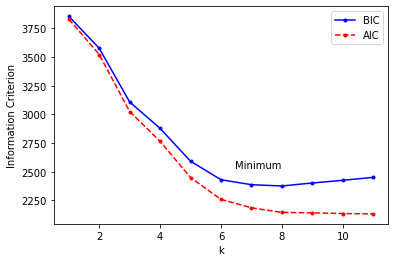

In [42]:
plt.plot(k_,bic_,'b.-',label = 'BIC')
plt.plot(k_,aic_,'r.--',label = 'AIC')
plt.legend()
plt.xlabel('k')
plt.ylabel('Information Criterion')
plt.annotate('Minimum', xy=(8, 2600), 
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
plt.show()

#### Bayesian Gaussian Mixture Models

Instead of manually selecting the value of k, we can use bayesian class which is capable of giving eqaul close to zero unenecessary clusters. 

In [32]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components = 10, n_init= 10)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10)

In [33]:
dump(bgm, 'models/ch_09/bgm.pkl')

['models/ch_09/bgm.pkl']

In [34]:
np.round(bgm.weights_,2) ##automatically predicts 8 clusters

array([0.16, 0.1 , 0.11, 0.14, 0.12, 0.14, 0.1 , 0.12, 0.  , 0.  ])

#### Other Algorithms for Anomaly and Novelty Detection

__PCA__

The reconstruction error for a normal instance is much lower than a reconstruction error of an anomaly. 

__Fast MCD__

This is effective in a clean dataset, it assumes the normal instances are generated from a single Gaussian distribution. It also assumes that the dataset is contaminated with outliers that were not generated from this gaussian distribution. the algorithm estimates the paramters of the gaussian distribution, it is careful to ignore the instances that are most likely outliers. 

__Isolation Forest__

this is efficient ifor high dimensional datasets/ the algo builds a random forest in which each decision tree is grown randomly, at each node/ it picks a feature randomly and then it picks a threshol value at random. the dataset gradually gets chopped into pieces this way, until all instances end up isolated from the other instances. Anomalies are usually far from other instances, so on average they tend to get isolated in fewer stesp than normal instances

__Local Outlier Factor (LOF)__

it comapres the density of the instance around a given instances to the density around its neighbors. an anomaly is often more isolated than its k-nearest neighbors

__One Class SVM__

this is suited for novely detection. kernalized SVM classifier separates two classes by first mapping all the instances to a high dimensional space, then separating the two classes using a linear SVM classifier with this high dimesional space. since we have one class of instances the one class svm alsogirthm instea tries to separate the instance in high dimensional spac from the origin. In the original pace, this will correspond to finding a small region that encompasses ll the instances. If a new instance does not fall within this region, it is n anomaly. There are a few hyperparameters to tweak: the usual ones or a kernelized SVM, plus a margin hyperparameter that corresponds to he probability of a new instance being mistakenly considered as novel hen it is in fact normal. It works great, especially with highdimensional atasets, but like all SVMs it does not scale to large atasets.


### Exercises

__1. How would you define clustering? Can you name a few clustering algorithms?__

clustering is done to identify similar charaterics instances together so that similar patterns can be drawn from these instances. Some clsutering algorithms are Kmeans, DBSCAN, Meanshift, agglomerative clustering etc. Some algorithms maybe better for uneven cluters or large datasets.

__2. What are some of the main applications of clustering algorithms?__

- data analysis, to generate better insigths by groups instad of whole dataset
- customer segmentation, to group custoemrs ogether for targeted campaigns etc. 
- recommender systems, to build grouping similar products
- anomaly detection, to find the outliers or the abnormal datapoints, fraud detection
- semi supervised learning, increasing prediction power of partially labeled dataset

__3. Describe two techniques to select the right number of clusters when using K-Means.__

- silhouette score: we can check the sc against different number of cluster and select the highest one
- inertia: inertia is the mse of instances from the centroids. we can plot it againsts the clusters and select the one with lowest inertia

__4. What is label propagation? Why would you implement it, and how?__

in practice we might have semi labeled dataset, hence using supervised learning is not possible on such dataset. We can use unsupervised learning algorithms to generate labels for the unlabled dataset. this is called label propogation, this prepares the data for supervised learning task and improves model prediciton capability.

__5. Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?__

- large dataset: Kmeans and BIRCH
- high density: DBSCAN and mean shift

__6. Can you think of a use case where active learning would be useful? How would you implement it?__

active learning can be implemented in case manual intervention is required to monitor and interact with the learning algorithm and provide labels and feedback for specific instance where the algorithms prompts them to.

__7. What is the difference between anomaly detection and novelty detection?__

Both novelty and outlier detection is a task of identifying abnormal instance in the dataset which might skew the data and interfer with the model prediction power. Novelty detection, makes an assumption that the dataset is clean and anomaly detection doesn't make any such assumption. 

__8. What is a Gaussian mixture? What tasks can you use it for?__

A gaussian mixture model is a probabilistic model that assumes that the instances were genreated form a mizture of several gaussian distribution whose paramters are unknowne. The assumption is that the instances are grouped in finite clusters with elliptical shaper. it's useful for outlier detection, clustering and density estimation.

__9. Can you name two techniques to find the right number of clusters when using a Gaussian mixture model?__

Unlike Kmeans, we cannot use intertia, since the clsuters can be of different shapes. Hence we have AIC and BIC criteria which work with the number of instance and other paramters to give the minimum score for the optimal cluster. they both minimize for hte same cluster. We can also use bayesian gaussian mixture model, it automatically selected the number of cluster.

__10. Step wise__

__a. The classic Olivetti faces dataset contains 400 grayscale 64 × 64– pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture.__

__b. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1).__

__c. Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set.__

__d. Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter).__

__e. Visualize the clusters: do you see similar faces in each cluster?__

In [33]:
##Loading the dataset

from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt

In [3]:
df = fetch_olivetti_faces(shuffle=True, random_state=42)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\apurv\scikit_learn_data


In [4]:
df.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
df.data[0]

array([0.1983471 , 0.23553719, 0.35123968, ..., 0.06198347, 0.12809917,
       0.09090909], dtype=float32)

In [6]:
len(df.data[0])

4096

In [7]:
X = df.data
y = df.target
img = df.images

In [28]:
##Spliting the dataset

##Spliting the train and test and val (70:15:15)

from sklearn.model_selection import train_test_split
X_1, X_val, y_1, y_val = train_test_split(X,y, test_size=0.15, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_1,y_1, test_size=0.175, stratify=y_1)

In [29]:
print(len(X_train),len( X_test), len(X_val))

280 60 60


In [30]:
print(len(X_train)/len(X),len( X_test)/len(X), len(X_val)/len(X))

0.7 0.15 0.15


In [35]:
##Ensuring same distribution in all three sets
targets = [y_train, y_test, y_val]

for t in targets:
    print(pd.DataFrame(y_train).value_counts())

0     7
1     7
22    7
23    7
24    7
25    7
26    7
27    7
28    7
29    7
30    7
31    7
32    7
33    7
34    7
35    7
36    7
37    7
38    7
21    7
20    7
19    7
9     7
2     7
3     7
4     7
5     7
6     7
7     7
8     7
10    7
18    7
11    7
12    7
13    7
14    7
15    7
16    7
17    7
39    7
dtype: int64
0     7
1     7
22    7
23    7
24    7
25    7
26    7
27    7
28    7
29    7
30    7
31    7
32    7
33    7
34    7
35    7
36    7
37    7
38    7
21    7
20    7
19    7
9     7
2     7
3     7
4     7
5     7
6     7
7     7
8     7
10    7
18    7
11    7
12    7
13    7
14    7
15    7
16    7
17    7
39    7
dtype: int64
0     7
1     7
22    7
23    7
24    7
25    7
26    7
27    7
28    7
29    7
30    7
31    7
32    7
33    7
34    7
35    7
36    7
37    7
38    7
21    7
20    7
19    7
9     7
2     7
3     7
4     7
5     7
6     7
7     7
8     7
10    7
18    7
11    7
12    7
13    7
14    7
15    7
16    7
17    7
39    7
dtype: int64


In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kn = []
sc = []
inertia = []

for k in range(2,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X_train)
    sc.append(silhouette_score(X_train, kmeans.labels_))
    inertia.append(kmeans.inertia_)
    kn.append(k)

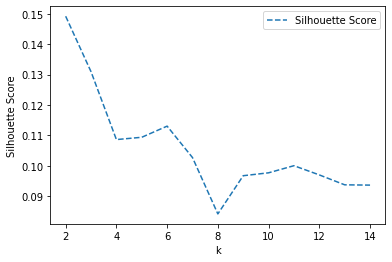

In [43]:
plt.plot(kn,sc, '--',label = "Silhouette Score")
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.legend()

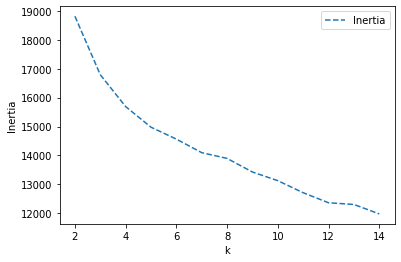

In [44]:
plt.plot(kn,inertia, '--',label = "Inertia")
plt.xlabel('k')
plt.ylabel('Inertia')
plt.legend()

Inertia elbow occurs at around k = 5 , and silhouette score suggested k = 8

In [45]:
from sklearn.manifold import TSNE

tsne = TSNE()
X_train_reduced = tsne.fit_transform(X_train)
X_train_reduced.shape
dump(tsne,'models/ch_09/ex_tsne.pkl')

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


['models/ch_09/ex_tsne.pkl']

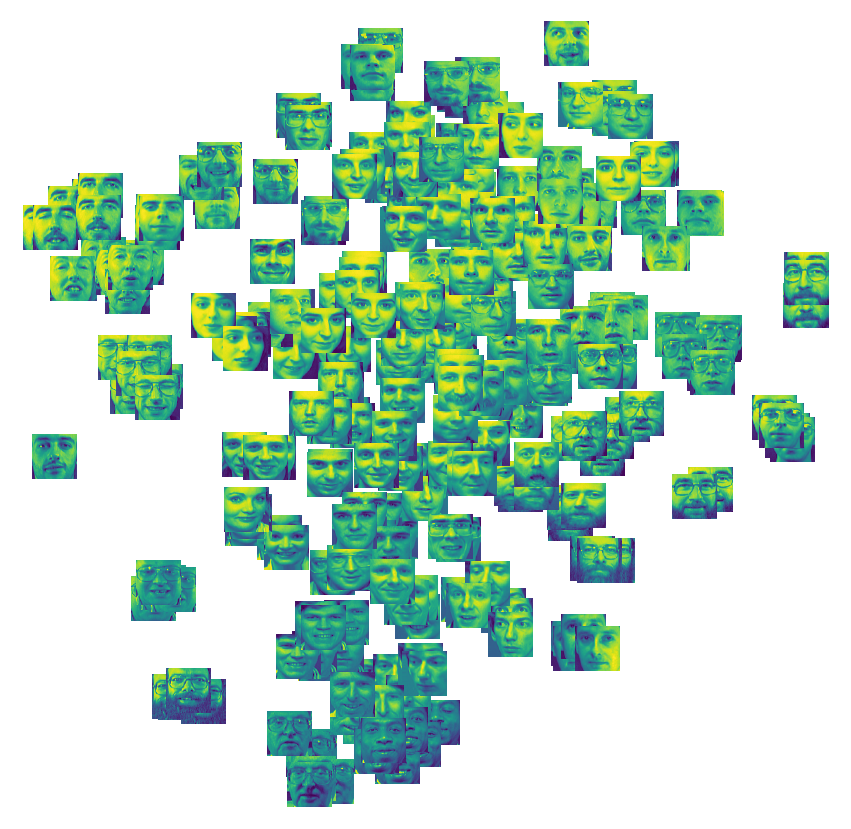

In [46]:
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(X_train_reduced[:, 0], X_train_reduced[:,1])

for idx in range(len(X_train_reduced)):
    ab = AnnotationBbox(OffsetImage(X_train[idx].reshape(64, 64), zoom=0.7), (X_train_reduced[idx, 0], X_train_reduced[idx, 1]), frameon=False)
    ax.add_artist(ab)

plt.axis('off')
plt.show()

Similiar faces are clustered together

__11. Step wise__

__a. Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set.__

__b. Next, use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set.__

__c. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach?__

__d. What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?__

In [47]:
##Training a classifier

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
dump(rf_clf, 'models/ch_09/ex_rf_clf.pkl')

['models/ch_09/ex_rf_clf.pkl']

In [50]:
from sklearn.metrics import accuracy_score

y_pred = rf_clf.predict(X_val)
accuracy_score(y_val,y_pred)

0.95

In [51]:
##Since we have 40 faces, we need around 40 clusters for Kmeans

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters = 40)
X_reduced_train = kmeans.fit_transform(X_train)
X_reduced_val = kmeans.transform(X_val)
X_reduced_test = kmeans.transform(X_test)

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(X_reduced_train, y_train)
y_pred = rf_clf.predict(X_reduced_val)
accuracy_score(y_val,y_pred)

0.7833333333333333

In [53]:
##Searching for best params
from sklearn.pipeline import Pipeline

kmeans = Pipeline([
    ("kmeans",KMeans()),
    ("rf_clf",RandomForestClassifier(n_estimators = 100)),
])

In [54]:

from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(kmeans, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.8s
[CV] END ...............................kmeans__n_clusters=3; total time=   1.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.9s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.9s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.9s
[CV] END ...............................kmeans__n_clusters=4; total time=   1.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   1.1s
[CV] END ...............................kmeans__n_clusters=5; total time=   1.2s
[CV] END ...............................kmeans__n_clusters=5; total time=   1.0s
[CV] END ...............................kmeans_

[CV] END ..............................kmeans__n_clusters=35; total time=   3.5s
[CV] END ..............................kmeans__n_clusters=36; total time=   3.8s
[CV] END ..............................kmeans__n_clusters=36; total time=   3.8s
[CV] END ..............................kmeans__n_clusters=36; total time=   3.5s
[CV] END ..............................kmeans__n_clusters=37; total time=   3.6s
[CV] END ..............................kmeans__n_clusters=37; total time=   3.6s
[CV] END ..............................kmeans__n_clusters=37; total time=   3.8s
[CV] END ..............................kmeans__n_clusters=38; total time=   3.9s
[CV] END ..............................kmeans__n_clusters=38; total time=   3.6s
[CV] END ..............................kmeans__n_clusters=38; total time=   3.7s
[CV] END ..............................kmeans__n_clusters=39; total time=   3.7s
[CV] END ..............................kmeans__n_clusters=39; total time=   4.2s
[CV] END ...................

[CV] END ..............................kmeans__n_clusters=69; total time=   6.3s
[CV] END ..............................kmeans__n_clusters=70; total time=   6.4s
[CV] END ..............................kmeans__n_clusters=70; total time=   6.4s
[CV] END ..............................kmeans__n_clusters=70; total time=   6.4s
[CV] END ..............................kmeans__n_clusters=71; total time=   6.5s
[CV] END ..............................kmeans__n_clusters=71; total time=   6.6s
[CV] END ..............................kmeans__n_clusters=71; total time=   6.5s
[CV] END ..............................kmeans__n_clusters=72; total time=   6.6s
[CV] END ..............................kmeans__n_clusters=72; total time=   6.6s
[CV] END ..............................kmeans__n_clusters=72; total time=   6.6s
[CV] END ..............................kmeans__n_clusters=73; total time=   6.9s
[CV] END ..............................kmeans__n_clusters=73; total time=   6.7s
[CV] END ...................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans()),
                                       ('rf_clf', RandomForestClassifier())]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [55]:
grid_clf.best_params_

{'kmeans__n_clusters': 78}

In [56]:
dump(grid_clf, 'models/ch_09/ex_grid_clf.pkl')

['models/ch_09/ex_grid_clf.pkl']

In [57]:
y_pred = grid_clf.predict(X_val)
accuracy_score(y_val,y_pred)

0.8333333333333334

In [58]:
##append the features from the reduced set to the original features 
##using the best params from grid search
kmeans = KMeans(n_clusters = 78)
X_reduced_train = kmeans.fit_transform(X_train)
X_reduced_val = kmeans.transform(X_val)
X_reduced_test = kmeans.transform(X_test)

In [61]:
X_train_tmp = np.concatenate((X_train, X_reduced_train), axis=1)
X_val_tmp = np.concatenate((X_val, X_reduced_val), axis=1)

In [62]:
rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(X_train_tmp,y_train)

RandomForestClassifier()

In [63]:
dump(rf_clf, 'models/ch_09/ex_rf_clf_concat.pkl')

['models/ch_09/ex_rf_clf_concat.pkl']

In [66]:
y_pred = rf_clf.predict(X_val_tmp)
accuracy_score(y_val,y_pred)

0.9333333333333333

Vanilla Classifier: 95% accuracy,\
Reducing KMeans 40 clusters = 78.3% accuracy,\
Grid Search KMneas 78 Clusters = 83.33% accuracy,\
append grid search and Kmeans 78 cluster = 93.33% accuracy

__12. Step Wise__

__a. Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset’s dimensionality (e.g., use PCA, preserving 99% of the variance).__

__b. Use the model to generate some new faces (using the sample() method), and visualize them (if you used PCA, you will need to use its inverse_transform() method).__

__c. Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect  the anomalies (i.e., compare the output of the score_samples() method for normal images and for anomalies).__

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)
dump(pca,'models/ch_09/ex_pca.pkl')

['models/ch_09/ex_pca.pkl']

In [68]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 30, n_init = 10)
gm.fit(X_train_pca)
dump(gm,'models/ch_09/ex_gm.pkl')

['models/ch_09/ex_gm.pkl']

In [69]:
##generate new faces

generated_samples, _ = gm.sample(n_samples=100)
generated_faces = pca.inverse_transform(generated_samples)

In [70]:
tsne = TSNE()
generated_faces_reduced = tsne.fit_transform(generated_faces)
generated_faces_reduced.shape

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(100, 2)

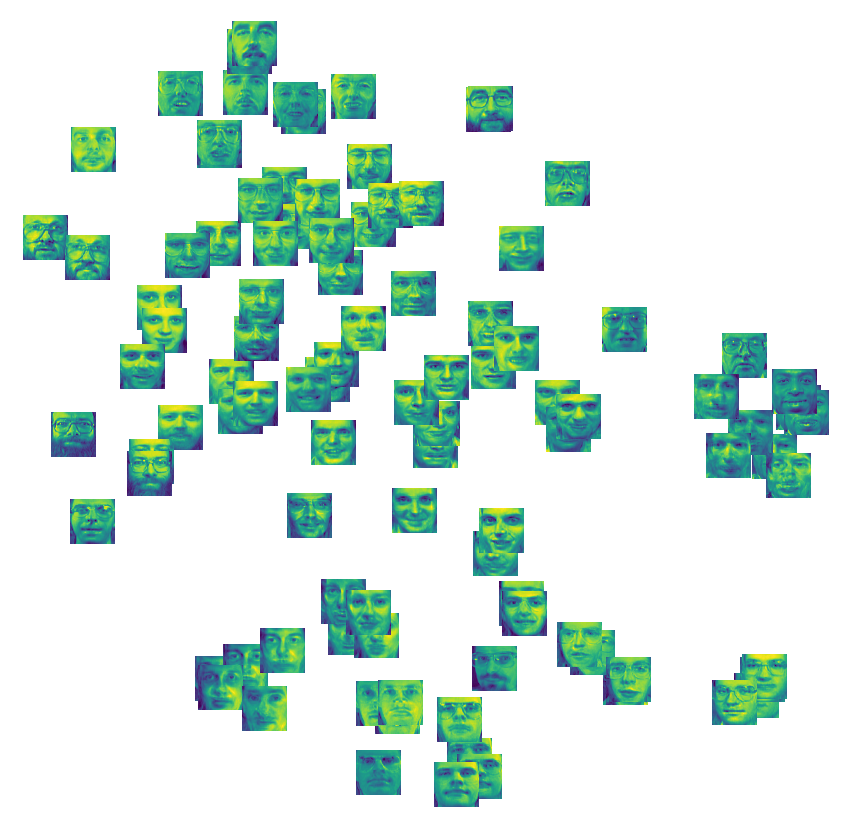

In [71]:

fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(generated_faces_reduced[:, 0], generated_faces_reduced[:,1])

for idx in range(len(generated_faces)):
    ab = AnnotationBbox(OffsetImage(generated_faces[idx].reshape(64, 64), zoom=0.7), (generated_faces_reduced[idx, 0], generated_faces_reduced[idx, 1]), frameon=False)
    ax.add_artist(ab)

plt.axis('off')
plt.show()

In [79]:
##Creating outliers
##A dataset can have <5% outliers

print(len(X_train)*0.03,len(X_train)*0.05) #we can have upto 8-14 outliers

8.4 14.0


In [123]:
##Creating outliers

##By shuffling

from sklearn.utils import shuffle
X_shuff = []
y_shuff =[]
j = 0

for i in range(0,len(X_train)-1,70):
    X_shuff.append(shuffle(X_train[i]))
    y_shuff.append(40)
    j+=1

In [124]:
len(X_shuff)

4

In [125]:
##Flipping
X_flip = []
y_flip =[]

for i in range(0,len(X_train)-1,50):
    X_flip.append(np.flip(X_train[i]))
    y_flip.append(40)

In [126]:
len(X_flip)

6

In [127]:
X_final = np.concatenate((X_train , X_shuff , X_flip), axis=0)
y_final = np.concatenate((y_train , y_shuff , y_flip), axis=0)

print(len(X_final), len(X_train) ,len(X_shuff),len(X_flip))

290 280 4 6


In [128]:
X_final_reduced = pca.transform(X_final)
densities = gm.score_samples(X_final_reduced)
density_threshold = np.percentile(densities, 4)
anomalies = X_final[densities < density_threshold]

In [129]:
len(anomalies) ##predicted 12 anomalies

12

In [130]:
y_final[densities < density_threshold] ##9/10 outliers are detected

array([26, 10, 37, 40, 40, 40, 40, 40, 40, 40, 40, 40])

__13. Step wise__

__a. Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image.__

__b. Next, take some of the modified images you built in the previous exercise, and look at their reconstruction error: notice how much larger the reconstruction error is.__

__c. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.__

In [131]:
X_preimage = pca.inverse_transform(X_train_pca)

##Calculating the recontruction error
from sklearn.metrics import mean_squared_error
mean_squared_error(X_train, X_preimage)

0.0010185959

In [133]:
len(X_final[y_final == 40])

10

In [136]:
X_preimage_mod = pca.inverse_transform(X_final_reduced[y_final == 40])

In [137]:
mean_squared_error(X_final[y_final == 40], X_preimage_mod)

0.018697256

Reconstruction error of normal images id 0.001 and that of modified images is 0.018.

In [140]:
tsne = TSNE()
X_train_reduced = tsne.fit_transform(X_final)

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


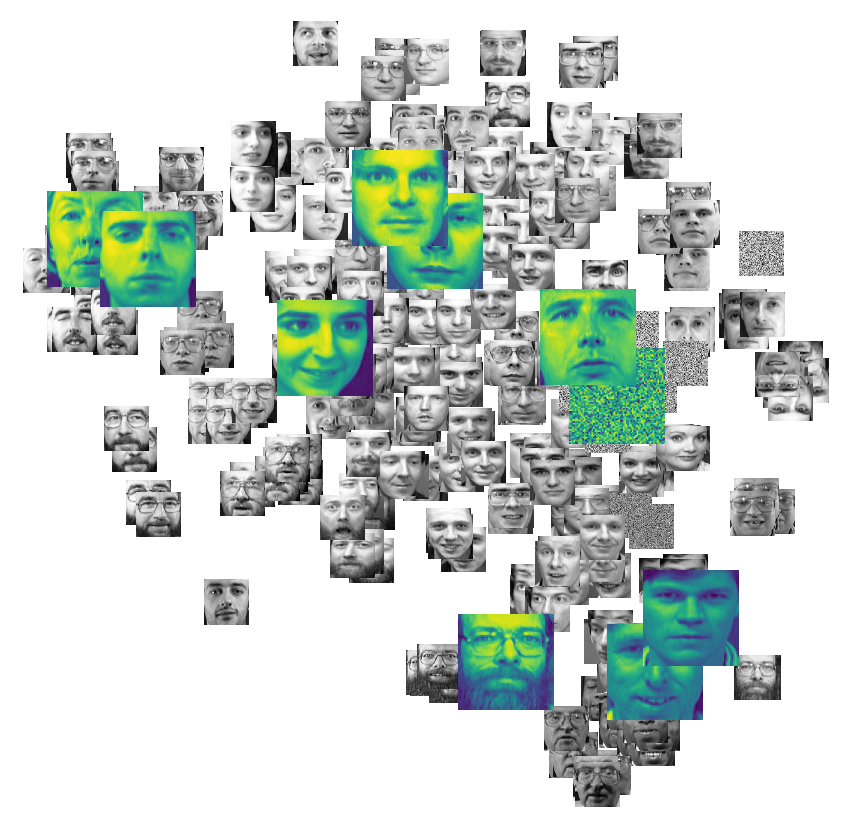

In [141]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1])

for idx in range(len(X_final)):
    ab = AnnotationBbox(OffsetImage(X_final[idx].reshape(64, 64), cmap='binary_r', zoom=0.7), (X_train_reduced[idx, 0], X_train_reduced[idx, 1]), frameon=False)
    ax.add_artist(ab)

for idx in  range(len(X_final[y_final == 40])):
    ab = AnnotationBbox(OffsetImage(X_final[idx].reshape(64, 64), zoom=1.5), (X_train_reduced[idx, 0], X_train_reduced[idx, 1]), frameon=False)
    ax.add_artist(ab)

plt.axis('off')
plt.show()